<a href="https://colab.research.google.com/github/kumagaimasahito/Tech/blob/master/programming/20200808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import urllib
import json
import matplotlib.pyplot as plt

In [47]:
url = 'http://api.e-stat.go.jp/rest/2.1/app/json/getStatsData?appId=&lang=J&statsDataId=0003412313&metaGetFlg=Y&cntGetFlg=N&sectionHeaderFlg=1'
with urllib.request.urlopen(url) as response:
    data = response.read()
d = json.loads(data.decode())

In [81]:
def get_data(cat01="001",cat02="001"):
    x = []
    y = []
    for value in d["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]:
        if value["@unit"] == "千人" and value["@cat01"] == cat01 and value["@cat02"] == cat02:
            x.append(int(value["@cat03"])-1001)
            y.append(int(value["$"]))
    return x,y

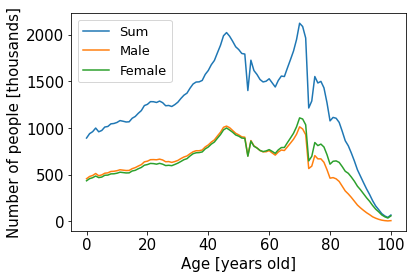

In [101]:
x_sum,y_sum = get_data(cat01="001",cat02="001")
x_male,y_male = get_data(cat01="002",cat02="001")
x_female,y_female = get_data(cat01="003",cat02="001")

plt.plot(x_sum[1:],y_sum[1:],label="Sum")
plt.plot(x_male[1:],y_male[1:],label="Male")
plt.plot(x_female[1:],y_female[1:],label="Female")
plt.tick_params(labelsize=15)
plt.legend(fontsize=13)
plt.xlabel("Age [years old]", fontsize=15)
plt.ylabel("Number of people [thousands]", fontsize=15)
plt.show()

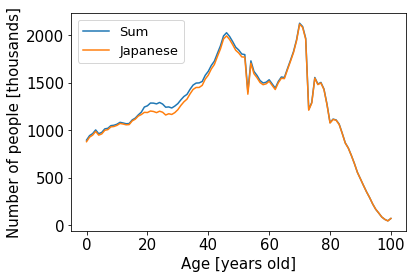

In [102]:
x_sum,y_sum = get_data(cat01="001",cat02="001")
x_jap,y_jap = get_data(cat01="001",cat02="002")

plt.plot(x_sum[1:],y_sum[1:],label="Sum")
plt.plot(x_jap[1:],y_jap[1:],label="Japanese")
plt.tick_params(labelsize=15)
plt.legend(fontsize=13)
plt.xlabel("Age [years old]", fontsize=15)
plt.ylabel("Number of people [thousands]", fontsize=15)
plt.show()